In [96]:
import yfinance as yf
import requests
from bs4 import BeautifulSoup
import re
import numpy as np

# download file from url
def pageRequest(url, headers, param=None, retries=3):
	resp = None

	try:
		resp = requests.get(url, params=param, headers=headers)
		resp.raise_for_status()
	except requests.exceptions.HTTPError as e:
		if 500 <= resp.status_code < 600 and retries > 0:
			print('Retries : {0}'.format(retries))
			return fredREQ(url, param, retries - 1)
		else:
			return resp.status_code
	return resp

In [91]:
##### get statistics

aapl = yf.Ticker('AAPL')

aapl_info = aapl.info

# sector
# 시가총액: marketCap
# 배당률: dividendRate
# pe ratio: trailingPE
# eps: trailingEps

sector = aapl_info['sector']
cap = aapl_info['marketCap']
dividends = aapl_info['dividendRate']
per = aapl_info['trailingPE']
eps = aapl_info['trailingEps']
close_price = aapl_info['previousClose']

# ROE = Net Income / Shareholder Equity
# BPS * ROE = EPS
# 슈퍼개미 김정환식 적정주가 계산
# (영업이익 또는 당기순이익) * (ROE*100) = 시가총액
# EPS * (ROE*100) = 적정주가

req = pageRequest(url, headers)

req_txt = req.text
soup = BeautifulSoup(req_txt, 'html.parser')

span = soup.find_all("span")

span_txt = [x.text for x in span]
span_index = span_txt.index('Return on Equity')
span_str = str(span[span_index])

react_id = span_str.split("=")[1].split(">")[0]
react_num = int(re.sub('"', '', react_id))

target_num = react_num + 4

roe = soup.find_all("td", {'data-reactid': target_num})
roe_num = float(re.sub('%', '', roe[0].text))

target_price = eps * roe_num
target_price

228.248

[*********************100%***********************]  1 of 1 completed


Text(0, 0.5, '거래규모[Volume]')

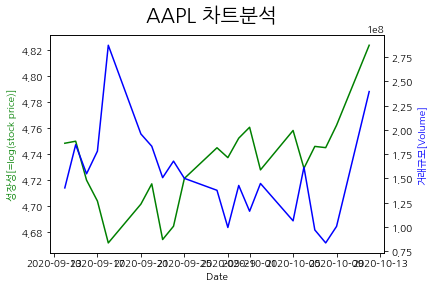

In [102]:
from datetime import datetime
from dateutil.relativedelta import relativedelta
import matplotlib
import matplotlib.pyplot as plt

########## get line data

# draw stock price
end_date = datetime.now()
end_str = end_date.strftime('%Y-%m-%d')

start_date = end_date - relativedelta(months=1)
start_str = start_date.strftime('%Y-%m-%d')
data = yf.download('AAPL', start_str, end_str)

x = data.index
y1 = np.log(data.Close)
y2 = data.Volume

#fig = plt.figure()

fig, ax1 = plt.subplots()
plt.suptitle('ggplot style')

ax2 = ax1.twinx()
ax1.plot(x, y1, 'g-')
ax2.plot(x, y2, 'b-')

fig.suptitle('AAPL 차트분석 - 1달', fontsize = 20)

ax1.set_xlabel('Date')
ax1.set_ylabel('성장성[=log(stock price)]', color='g', fontsize = 12)
ax2.set_ylabel('거래규모[Volume]', color='b', fontsize = 12)
fig.savefig(save_path + save_name)


def draw_analysis_plot(stock_name, start_date, end_date,
						save_path, save_name):

    fig, ax1 = plt.subplots()
    plt.suptitle('ggplot style')
    ax2 = ax1.twinx()

	data = yf.download(stock_name, start_date, end_date) 

    x = data.index
    y1 = np.log(data.Close)
    y2 = data.Volume

	ax1.plot(x, y1, 'g-')
    ax2.plot(x, y2, 'b-')

    fig.suptitle(stock_name + ' 차트분석', fontsize = 20)

    ax1.set_xlabel('Date')
    ax1.set_ylabel('성장성[=log(stock price)]', color='g', fontsize = 12)
    ax2.set_ylabel('거래규모[Volume]', color='b', fontsize = 12)
    
	fig.savefig(save_path + save_name)


In [107]:
def draw_analysis_plot(stock_name, start_date, end_date,
						save_path, save_name):

    fig, ax1 = plt.subplots()
    plt.suptitle('ggplot style')
    ax2 = ax1.twinx()

    data = yf.download(stock_name, start_date, end_date)

    x = data.index
    y1 = np.log(data.Close)
    y2 = data.Volume

    ax1.plot(x, y1, 'g-')
    ax2.plot(x, y2, 'b-')

    fig.suptitle(stock_name + ' 차트분석', fontsize = 20)

    ax1.set_xlabel('Date')
    ax1.set_ylabel('성장성[=log(stock price)]', color='g', fontsize = 12)
    ax2.set_ylabel('거래규모[Volume]', color='b', fontsize = 12)
    
    fig.savefig(save_path + save_name)

[*********************100%***********************]  1 of 1 completed


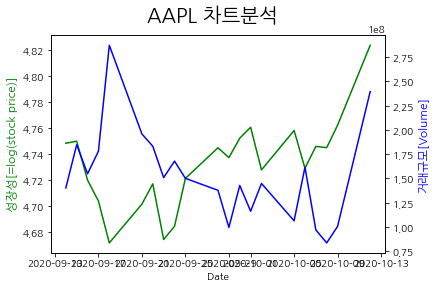

In [115]:
import pandas as pd
save_path = os.getcwd() + "/save/"
stock = 'AAPL'
stat_df = pd.read_csv(save_path + stock + "_stats.txt", sep = "|")
stat_value = stat_df.stats.astype(str).values
market_cap = str(round(int(stat_value[1])/100000000, 1))
market_cap

'21275.5'

In [74]:

url = "https://finance.yahoo.com/quote/AAPL/key-statistics?p=AAPL"

# make header
headers = {'Referer': url,
           'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.132 Safari/537.36'}

req = fredREQ(url, headers)

req_txt = req.text
soup = BeautifulSoup(req_txt, 'html.parser')

span = soup.find_all("span")

span_txt = [x.text for x in span]
span_index = span_txt.index('Return on Equity')
span_str = str(span[span_index])

react_id = span_str.split("=")[1].split(">")[0]
react_num = int(re.sub('"', '', react_id))

target_num = react_num + 4

roe = soup.find_all("td", {'data-reactid': target_num})
roe_num = float(re.sub('%', '', roe[0].text))

In [89]:
roe_num

69.25